In [29]:
# Import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Read in raw csv
df = pd.read_csv('Data/unprocessed_data.csv')

# Check to make sure it imported
df.head(1)

,id,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,...,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars
0,tt0073195,Jaws,https://www.imdb.com/title/tt0073195,1975,2h 4m,PG,8.1,683K,7000000.0,477220580.0,...,"['Peter Benchley', 'Carl Gottlieb']","['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...","['Monster Horror', 'Sea Adventure', 'Survival'...",['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...",['English'],0,20,0


In [31]:
# Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33600 non-null  object 
 1   Title                  33600 non-null  object 
 2   Movie Link             33600 non-null  object 
 3   Year                   33600 non-null  int64  
 4   Duration               33379 non-null  object 
 5   MPA                    25624 non-null  object 
 6   Rating                 33462 non-null  float64
 7   Votes                  33462 non-null  object 
 8   budget                 11815 non-null  float64
 9   grossWorldWide         18222 non-null  float64
 10  gross_US_Canada        17571 non-null  float64
 11  opening_weekend_Gross  15523 non-null  float64
 12  directors              33241 non-null  object 
 13  writers                32024 non-null  object 
 14  stars                  33127 non-null  object 
 15  ge

In [32]:
# Remove unnecessary columns from df
df_step_1 = df[[
    'id',
    'Title',
    'Year',
    'Rating',
    'Votes',
    'budget',
    'grossWorldWide',
    'gross_US_Canada',
    'opening_weekend_Gross',
    'genres',
    'production_companies',
    'nominations',
    'oscars'
]]

df_step_1.head()

,id,Title,Year,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,genres,production_companies,nominations,oscars
0,tt0073195,Jaws,1975,8.1,683K,7000000.0,477220580.0,266567580.0,7061513.0,"['Monster Horror', 'Sea Adventure', 'Survival'...","['Zanuck/Brown Productions', 'Universal Pictur...",20,0
1,tt0073629,The Rocky Horror Picture Show,1975,7.4,173K,1200000.0,115798478.0,112892319.0,NaN,"['Dark Comedy', 'Raunchy Comedy', 'Rock Musica...","['Twentieth Century Fox', 'Michael White Produ...",4,0
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,8.7,1.1M,3000000.0,109115366.0,108981275.0,NaN,"['Medical Drama', 'Psychological Drama', 'Drama']","['Fantasy Films', 'N.V. Zvaluw']",15,0
3,tt0072890,Dog Day Afternoon,1975,8.0,279K,1800000.0,50002721.0,50000000.0,NaN,"['Heist', 'True Crime', 'Biography', 'Crime', ...","['Warner Bros.', 'Artists Entertainment Complex']",20,0
4,tt0073692,Shampoo,1975,6.4,15K,4000000.0,49407734.0,49407734.0,NaN,"['Satire', 'Comedy', 'Drama']","['Persky-Bright / Vista', 'Columbia Pictures',...",11,0


In [33]:
# Update names for clarity
df_step_2 = df_step_1.rename(columns= {
    'Title': 'title',
    'Year': 'year',
    'Rating': 'rating',
    'Votes': 'votes',
    'grossWorldWide': 'gross_world_wide',
    'gross_US_Canada': 'gross_us_canada',
    'opening_weekend_Gross': 'opening_weekend_gross'
})

In [34]:
# Filter dataset for all movies after the year 2005
df_step_3 = df_step_2[df_step_2['year'] >= 2005].reset_index()
df_step_3.head()

,index,id,title,year,rating,votes,budget,gross_world_wide,gross_us_canada,opening_weekend_gross,genres,production_companies,nominations,oscars
0,2000,tt1502397,Bad Boys for Life,2020,6.5,187K,90000000.0,426505244.0,206305244.0,62504105.0,"['Buddy Cop', 'Cop Drama', 'Action', 'Comedy',...","['Columbia Pictures', '2.0 Entertainment', 'Do...",15,0
1,2001,tt8332922,A Quiet Place Part II,2020,7.2,296K,61000000.0,297372261.0,160072261.0,47547231.0,"['Alien Invasion', 'Monster Horror', 'Supernat...","['Paramount Pictures', 'Platinum Dunes', 'Sund...",44,1
2,2002,tt3794354,Sonic the Hedgehog,2020,6.5,171K,85000000.0,319715683.0,148974665.0,58018348.0,"['Animal Adventure', 'Buddy Comedy', 'Road Tri...","['Paramount Pictures', 'Sega Sammy Group', 'Or...",12,0
3,2003,tt7713068,Birds of Prey and the Fantabulous Emancipation...,2020,6.1,271K,84500000.0,205537933.0,84172791.0,33010017.0,"['Dark Comedy', 'Superhero', 'Action', 'Comedy...","['Clubhouse Pictures (II)', 'DC Entertainment'...",83,0
4,2004,tt6673612,Dolittle,2020,5.6,73K,175000000.0,251410631.0,77047065.0,21844045.0,"['Animal Adventure', 'Quest', 'Adventure', 'Co...","['Universal Pictures', 'Perfect World Pictures...",9,0


In [35]:
# Drop all rows with missing vlaues
cleaned_df = df_step_3.dropna()
cleaned_df.head()

,index,id,title,year,rating,votes,budget,gross_world_wide,gross_us_canada,opening_weekend_gross,genres,production_companies,nominations,oscars
0,2000,tt1502397,Bad Boys for Life,2020,6.5,187K,90000000.0,426505244.0,206305244.0,62504105.0,"['Buddy Cop', 'Cop Drama', 'Action', 'Comedy',...","['Columbia Pictures', '2.0 Entertainment', 'Do...",15,0
1,2001,tt8332922,A Quiet Place Part II,2020,7.2,296K,61000000.0,297372261.0,160072261.0,47547231.0,"['Alien Invasion', 'Monster Horror', 'Supernat...","['Paramount Pictures', 'Platinum Dunes', 'Sund...",44,1
2,2002,tt3794354,Sonic the Hedgehog,2020,6.5,171K,85000000.0,319715683.0,148974665.0,58018348.0,"['Animal Adventure', 'Buddy Comedy', 'Road Tri...","['Paramount Pictures', 'Sega Sammy Group', 'Or...",12,0
3,2003,tt7713068,Birds of Prey and the Fantabulous Emancipation...,2020,6.1,271K,84500000.0,205537933.0,84172791.0,33010017.0,"['Dark Comedy', 'Superhero', 'Action', 'Comedy...","['Clubhouse Pictures (II)', 'DC Entertainment'...",83,0
4,2004,tt6673612,Dolittle,2020,5.6,73K,175000000.0,251410631.0,77047065.0,21844045.0,"['Animal Adventure', 'Quest', 'Adventure', 'Co...","['Universal Pictures', 'Perfect World Pictures...",9,0


In [36]:
# Check the data
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4378 entries, 0 to 10687
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  4378 non-null   int64  
 1   id                     4378 non-null   object 
 2   title                  4378 non-null   object 
 3   year                   4378 non-null   int64  
 4   rating                 4378 non-null   float64
 5   votes                  4378 non-null   object 
 6   budget                 4378 non-null   float64
 7   gross_world_wide       4378 non-null   float64
 8   gross_us_canada        4378 non-null   float64
 9   opening_weekend_gross  4378 non-null   float64
 10  genres                 4378 non-null   object 
 11  production_companies   4378 non-null   object 
 12  nominations            4378 non-null   int64  
 13  oscars                 4378 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 513.0+ KB


## Nicolas IMDB Correlation Analysis

In [37]:
# Create a copy of cleaned df for analysis
cor_df = cleaned_df.copy()

# Ensure numeric data types for calculations
cor_df['votes'] = pd.to_numeric(cor_df['votes'], errors='coerce')

In [38]:
# Group the data by year and calculate relevant metrics
grouped_data_full = cor_df.groupby('year').agg({
    'budget': 'sum',
    'gross_us_canada': 'sum',
    'gross_world_wide': 'sum',
    'nominations': 'sum',
    'oscars': 'sum',
    'votes': 'sum',
    'rating': 'mean'
}).reset_index()

# Check the calculations
grouped_data_full


,year,budget,gross_us_canada,gross_world_wide,nominations,oscars,votes,rating
0,2005,1.553998e+10,8.567808e+09,1.796892e+10,3045,42,11291.0,6.246690
1,2006,2.200316e+10,8.978477e+09,1.929106e+10,3329,51,13794.0,6.314013
2,2007,8.466157e+09,8.879567e+09,2.036523e+10,3259,45,13020.0,6.313183
3,2008,1.085565e+10,9.469791e+09,2.188477e+10,3386,47,14657.0,6.252698
4,2009,9.698641e+09,1.036045e+10,2.394694e+10,3664,55,10982.0,6.320792
5,2010,1.104976e+10,1.004622e+10,2.441087e+10,4204,54,14756.0,6.286851
6,2011,3.729829e+10,7.472151e+09,1.988084e+10,2851,29,6515.0,6.176098
7,2012,6.613154e+09,1.985591e+09,4.990062e+09,2212,22,8230.0,6.243503
8,2013,1.888163e+10,9.731557e+09,2.488176e+10,4201,59,11874.0,6.394091
9,2014,1.168600e+10,1.066421e+10,2.744540e+10,4815,44,2560.0,6.386166


In [39]:
# Calculate relative changes (percentage changes)
grouped_data_full['budget_change'] = grouped_data_full['budget'].pct_change() * 100
grouped_data_full['gross_us_change'] = grouped_data_full['gross_us_canada'].pct_change() * 100
grouped_data_full['gross_world_change'] = grouped_data_full['gross_world_wide'].pct_change() * 100
grouped_data_full['nominations_change'] = grouped_data_full['nominations'].pct_change() * 100
grouped_data_full['oscars_change'] = grouped_data_full['oscars'].pct_change() * 100
grouped_data_full['votes_change'] = grouped_data_full['votes'].pct_change() * 100
grouped_data_full['avg_rating_change'] = grouped_data_full['rating'].pct_change() * 100

# Update DataFrame to only contain percent change values
grouped_data = grouped_data_full[[
    'budget_change',
    'gross_us_change',
    'gross_world_change',
    'nominations_change',
    'oscars_change',
    'votes_change',
    'avg_rating_change'
]].drop(index=0).reset_index(drop=True)

# Export to csv for sqlite db file
grouped_data.to_csv('Data/heatmap.csv')

# Extra analytical steps

In [40]:
# Raw variables for analysis
raw_variables_to_analyze = {
    'gross_us_canada': 'Gross US Revenue',
    'gross_world_wide': 'Gross Worldwide Revenue',
    'nominations': 'Nominations',
    'oscars': 'Oscars',
    'votes': 'Votes',
    'rating': 'Average Rating',
}

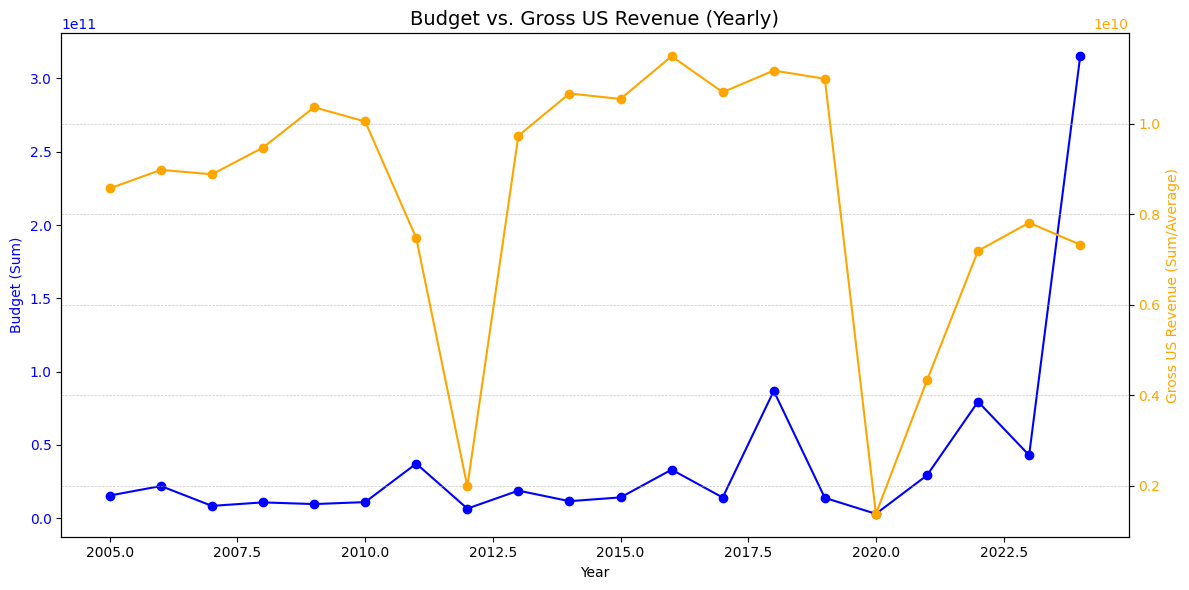

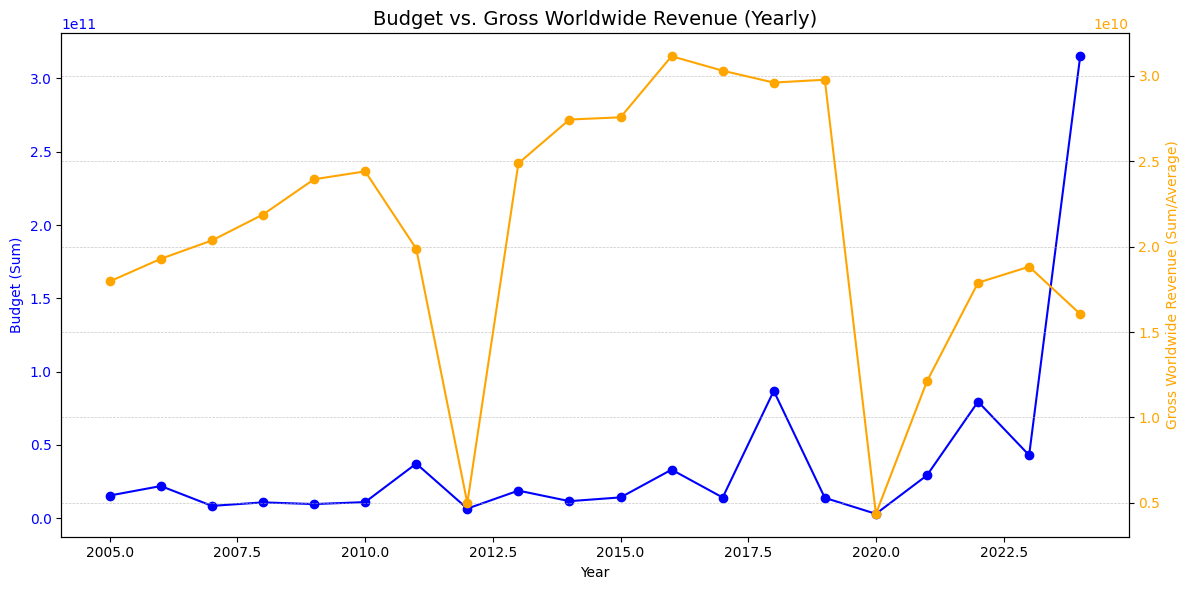

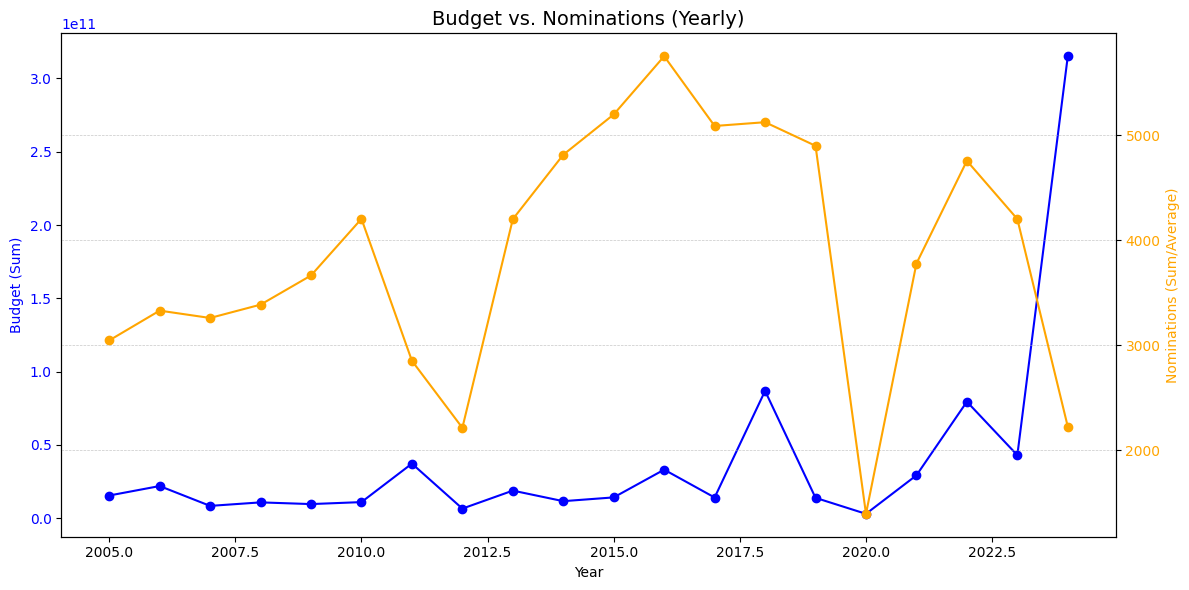

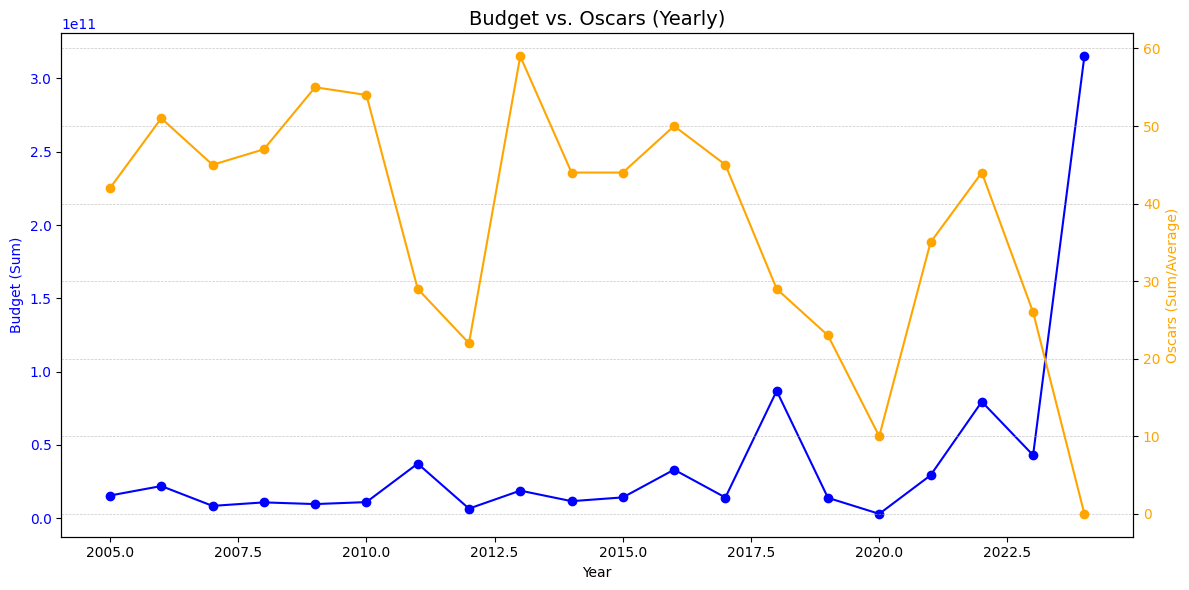

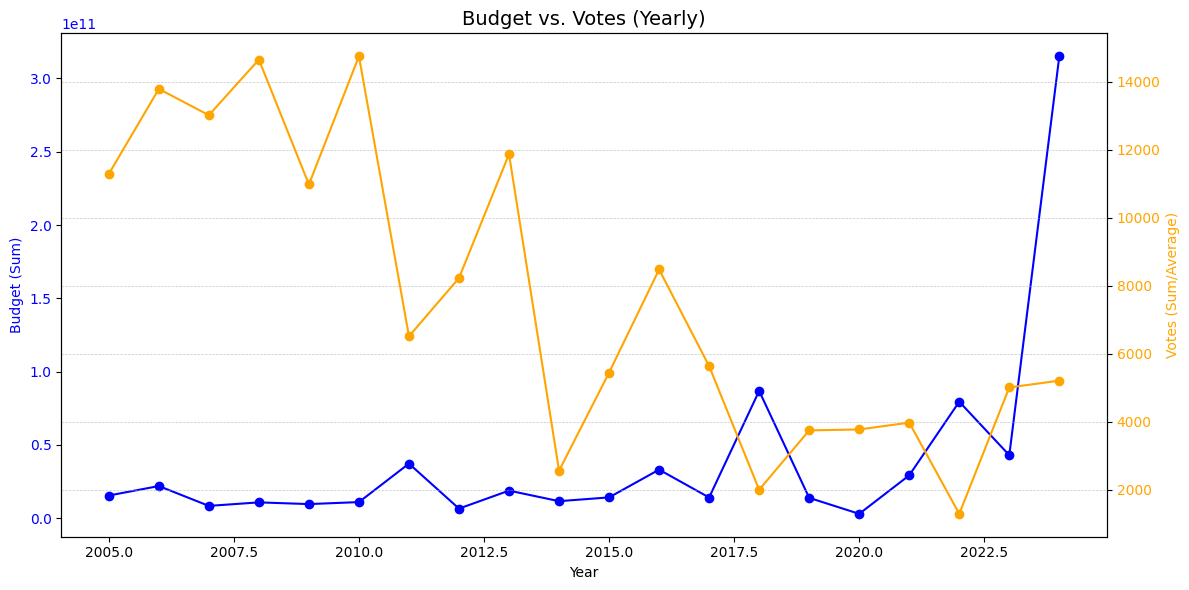

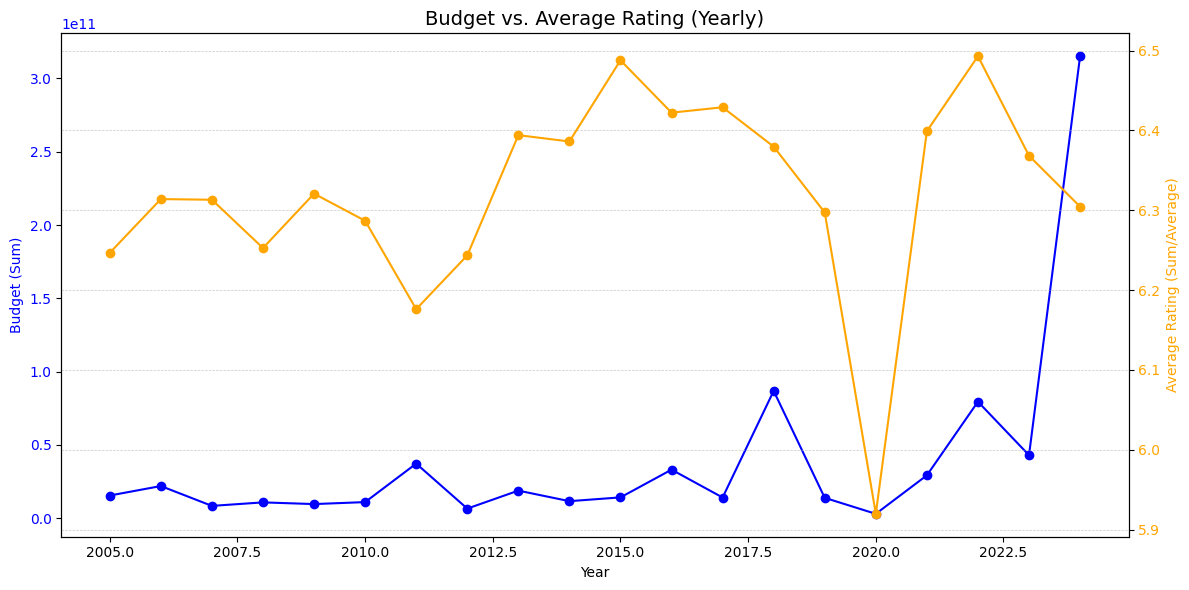

In [41]:
# Plot the raw sums and averages with a secondary y-axis
for variable, label in raw_variables_to_analyze.items():
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot budget on the primary y-axis
    ax1.plot(grouped_data_full['year'], grouped_data_full['budget'], label='Budget (Sum)', marker='o', color='blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Budget (Sum)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create secondary y-axis for the other variable
    ax2 = ax1.twinx()
    ax2.plot(grouped_data_full['year'], grouped_data_full[variable], label=f'{label} (Sum/Average)', marker='o', color='orange')
    ax2.set_ylabel(f'{label} (Sum/Average)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    
    # Add title and grid
    plt.title(f'Budget vs. {label} (Yearly)', fontsize=14)
    fig.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

In [42]:
# Relative change variables for correlation analysis
relative_variables_to_analyze = {
    'gross_us_change': 'Gross US Change (%)',
    'gross_world_change': 'Gross Worldwide Change (%)',
    'nominations_change': 'Nominations Change (%)',
    'oscars_change': 'Oscars Change (%)',
    'votes_change': 'Votes Change (%)',
    'avg_rating_change': 'Average Rating Change (%)',
}

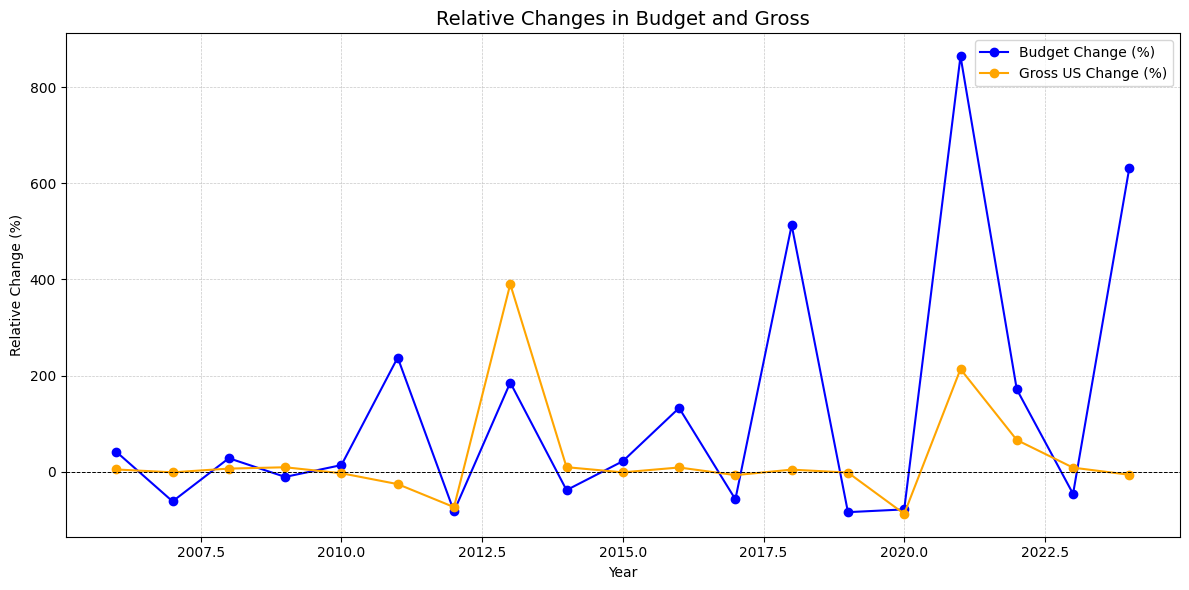

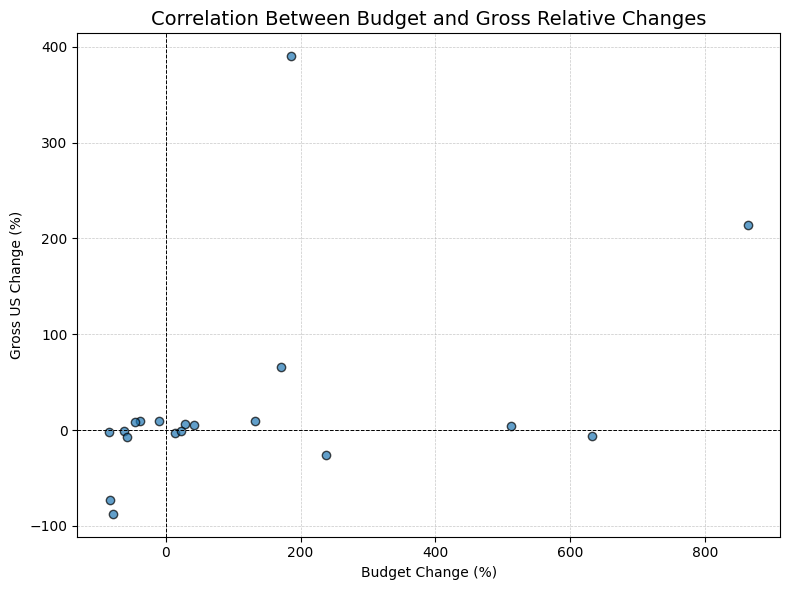

Correlation coefficient between Budget Change and Gross Relative Changes: 0.41


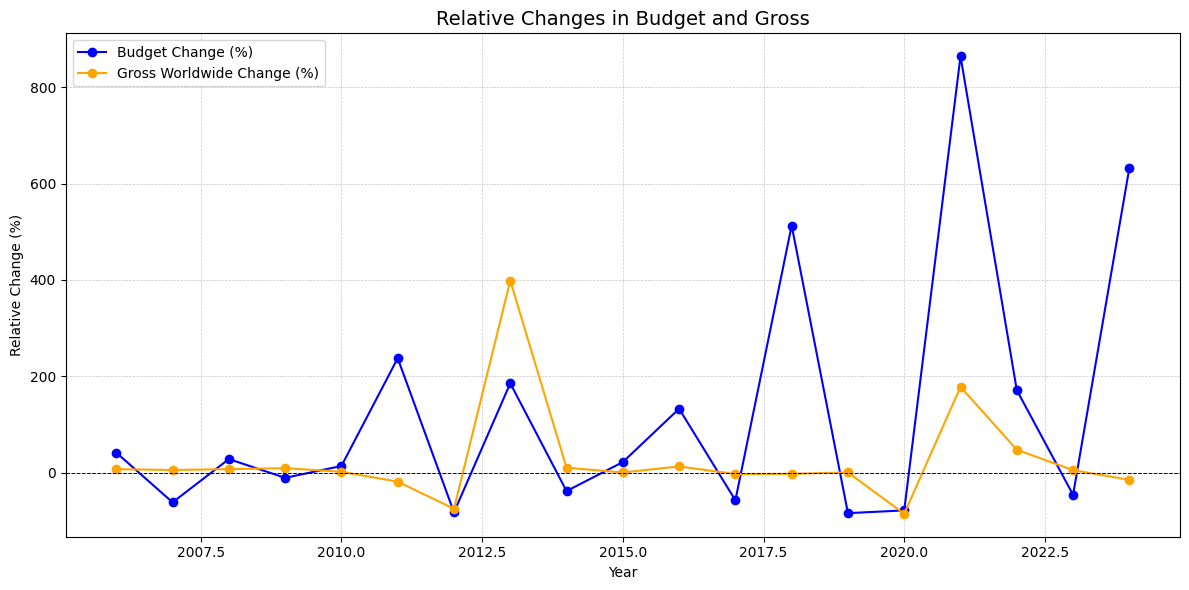

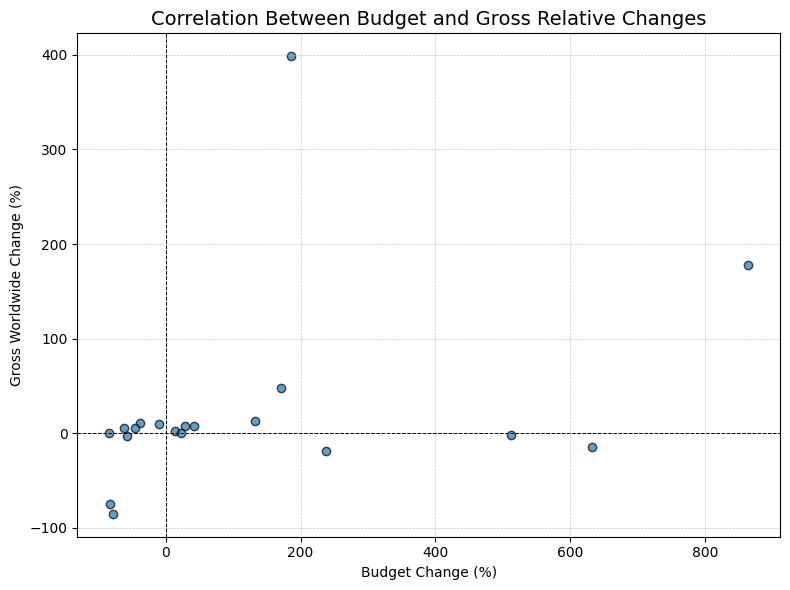

Correlation coefficient between Budget Change and Gross Relative Changes: 0.35


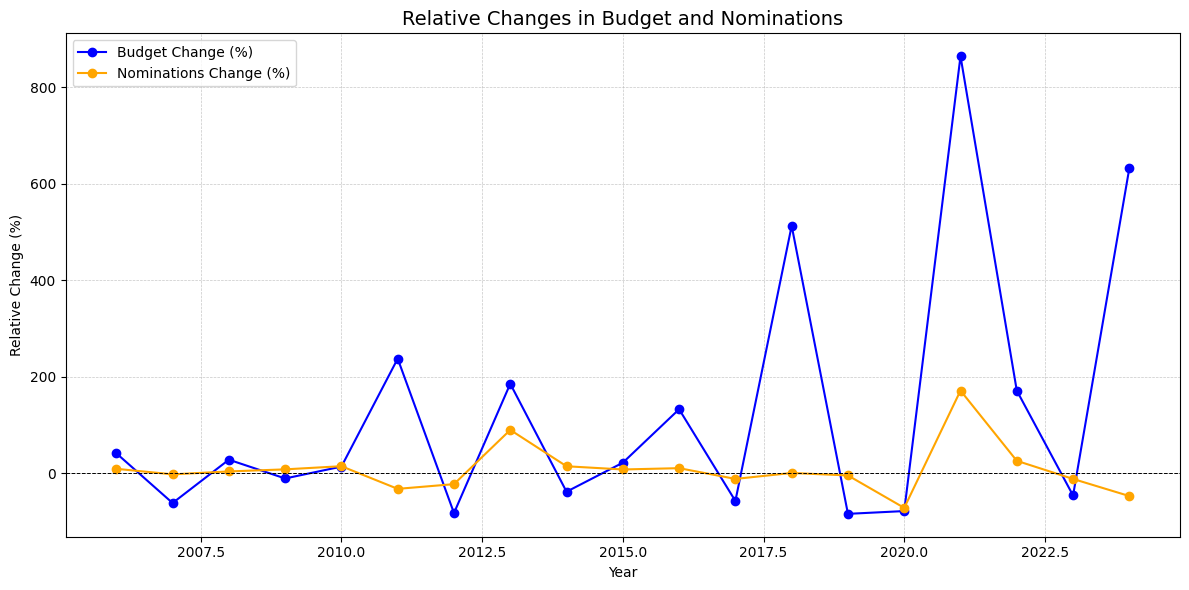

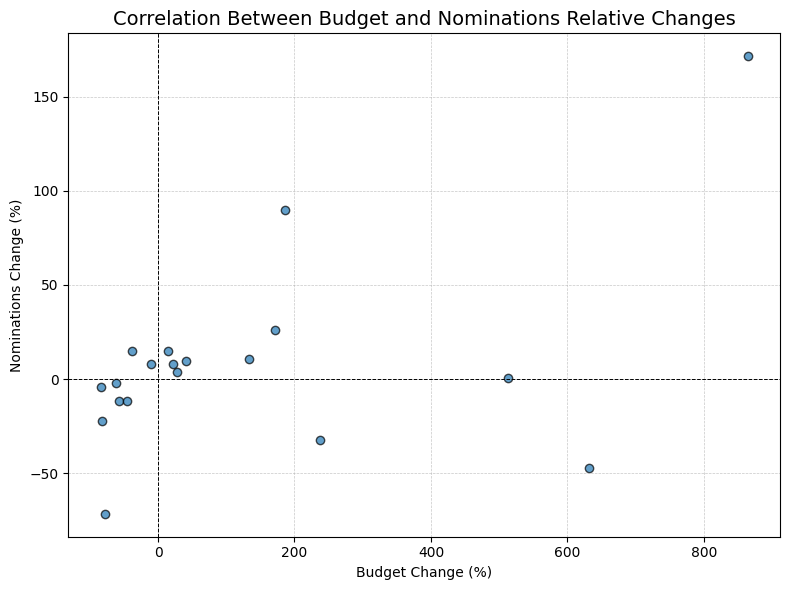

Correlation coefficient between Budget Change and Nominations Relative Changes: 0.50


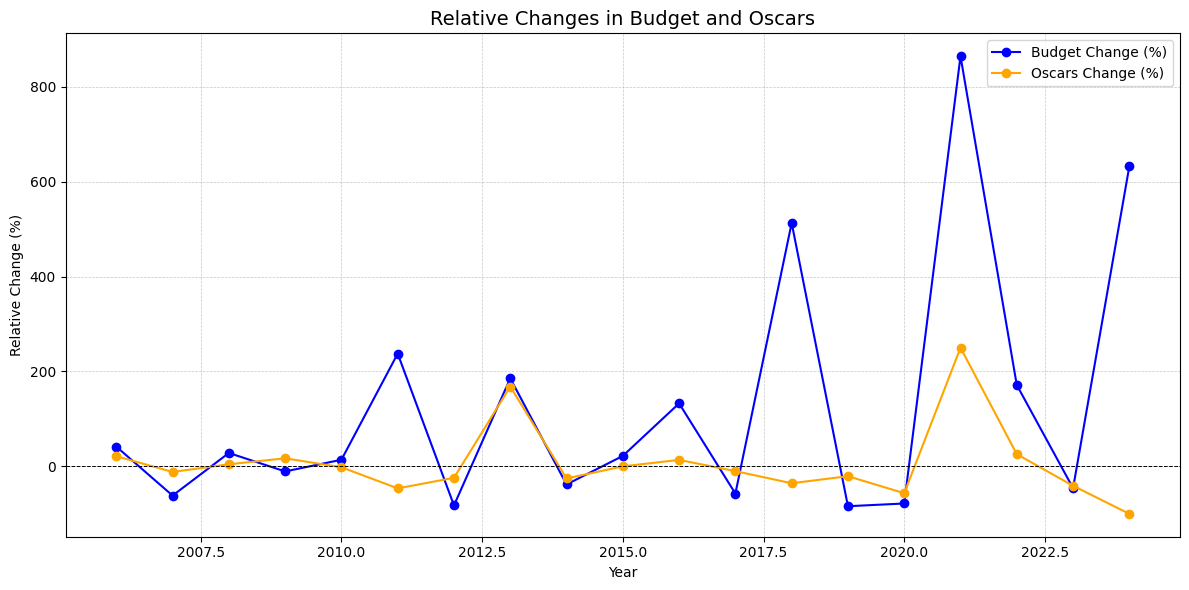

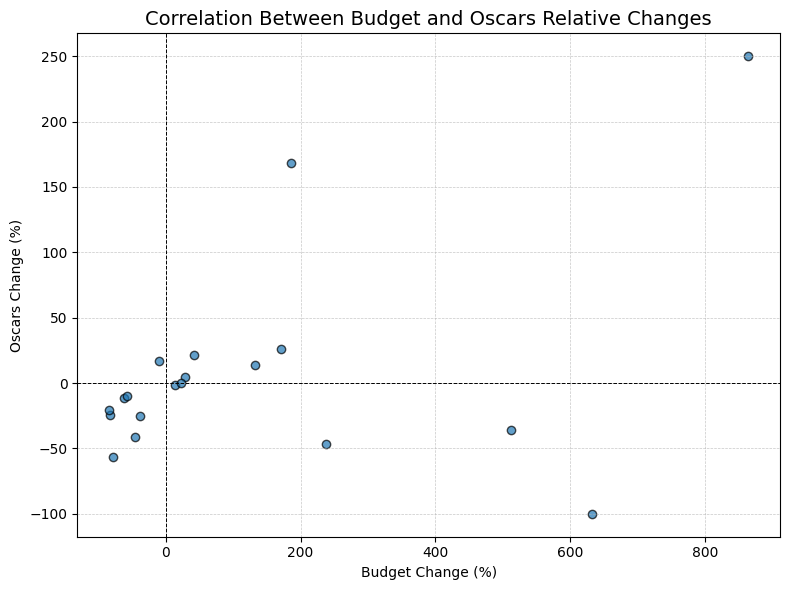

Correlation coefficient between Budget Change and Oscars Relative Changes: 0.42


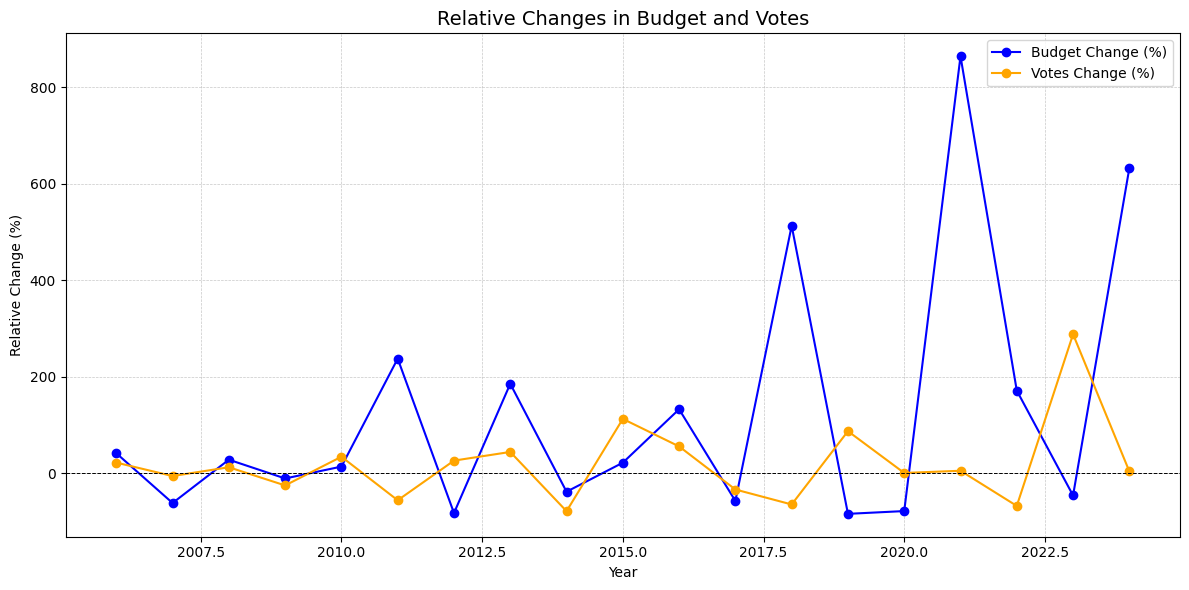

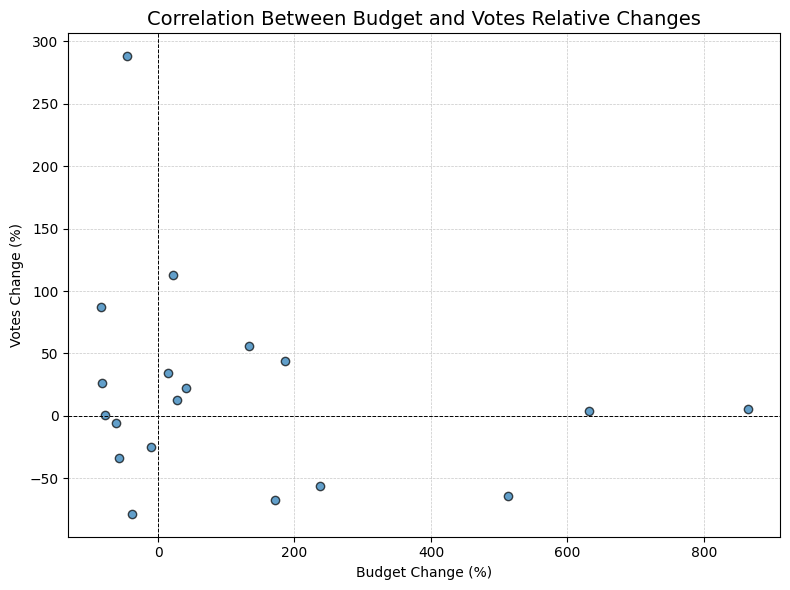

Correlation coefficient between Budget Change and Votes Relative Changes: -0.24


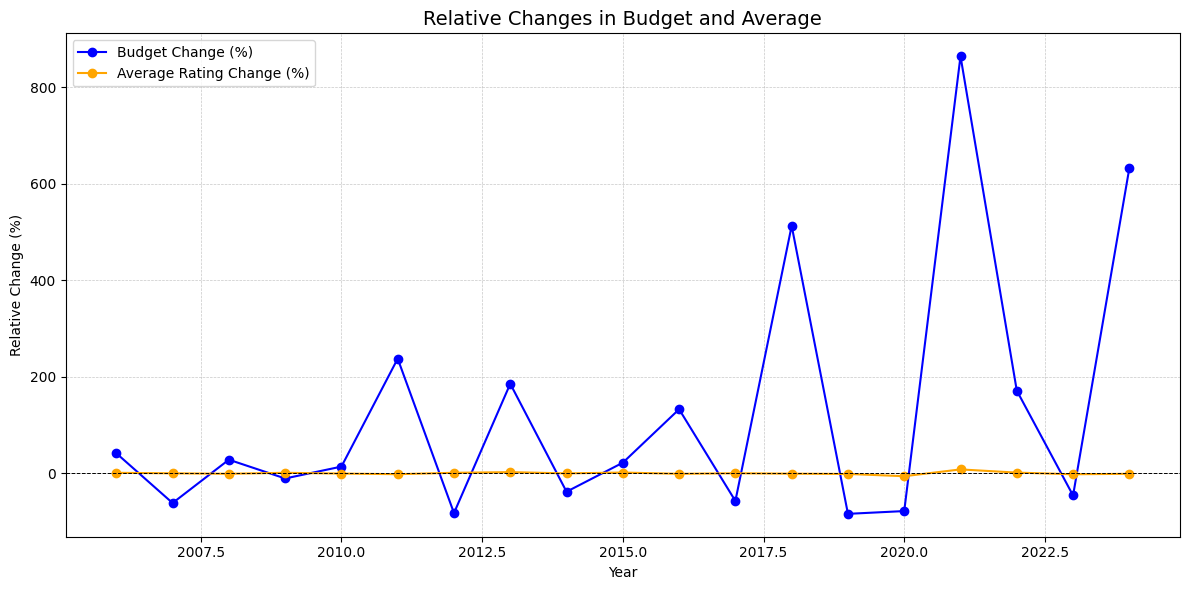

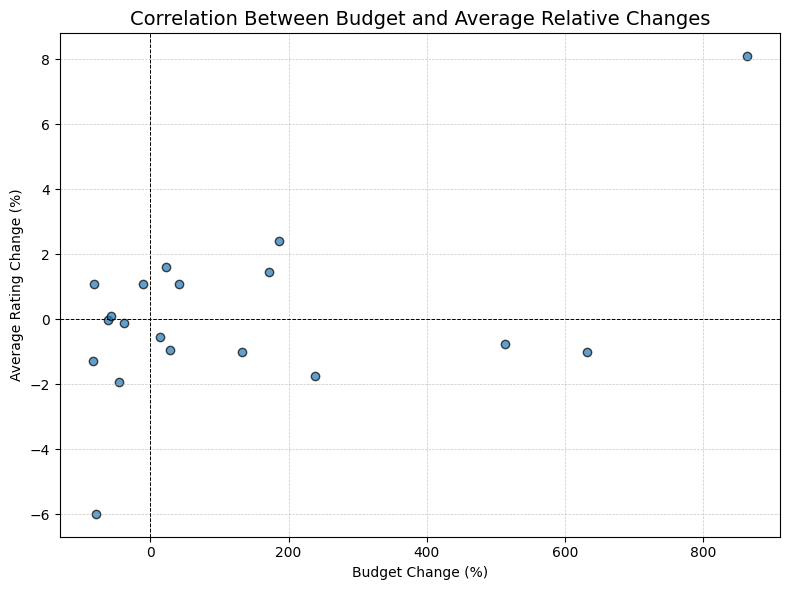

Correlation coefficient between Budget Change and Average Relative Changes: 0.51


In [43]:
# Perform relative change analysis
for variable, label in relative_variables_to_analyze.items():
    # Line chart of relative changes
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data_full['year'], grouped_data_full['budget_change'], label='Budget Change (%)', marker='o', color='blue')
    plt.plot(grouped_data_full['year'], grouped_data_full[variable], label=label, marker='o', color='orange')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
    plt.title(f'Relative Changes in Budget and {label.split()[0]}', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Relative Change (%)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Scatter plot for correlation of relative changes
    plt.figure(figsize=(8, 6))
    plt.scatter(grouped_data_full['budget_change'], grouped_data_full[variable], alpha=0.7, edgecolors='k')
    plt.title(f'Correlation Between Budget and {label.split()[0]} Relative Changes', fontsize=14)
    plt.xlabel('Budget Change (%)')
    plt.ylabel(label)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.7)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Calculate and display correlation coefficient
    correlation_coefficient = grouped_data_full[['budget_change', variable]].corr().iloc[0, 1]
    print(f'Correlation coefficient between Budget Change and {label.split()[0]} Relative Changes: {correlation_coefficient:.2f}')

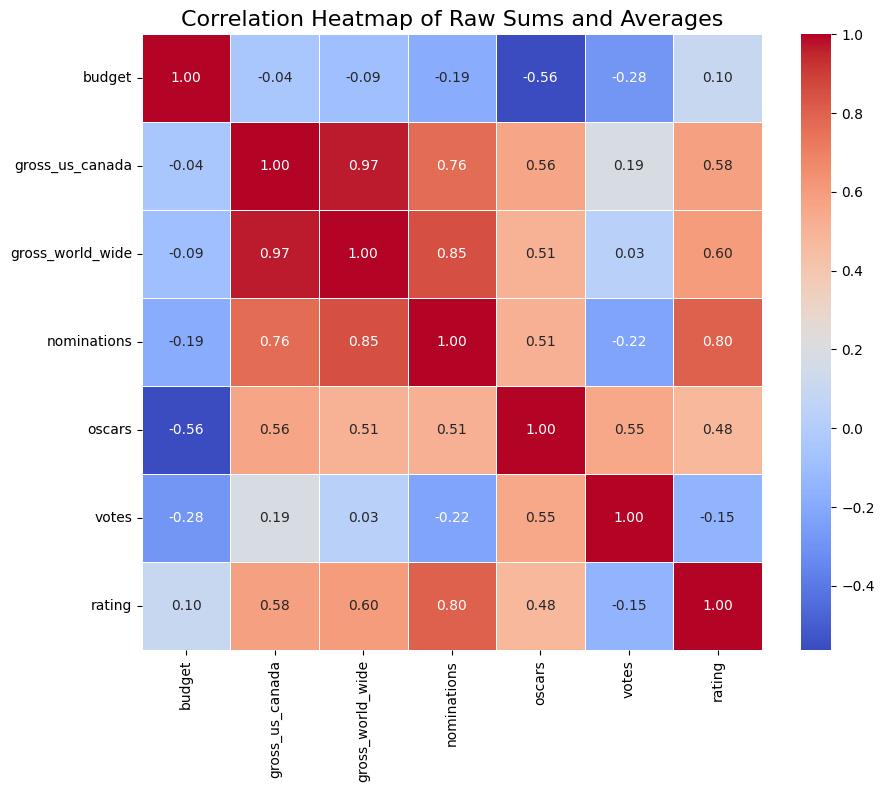

In [44]:
# Heatmap for raw sums and averages
raw_correlation_matrix = grouped_data_full[[
    'budget',
    'gross_us_canada',
    'gross_world_wide',
    'nominations',
    'oscars',
    'votes',
    'rating'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(raw_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Raw Sums and Averages', fontsize=16)
plt.show()

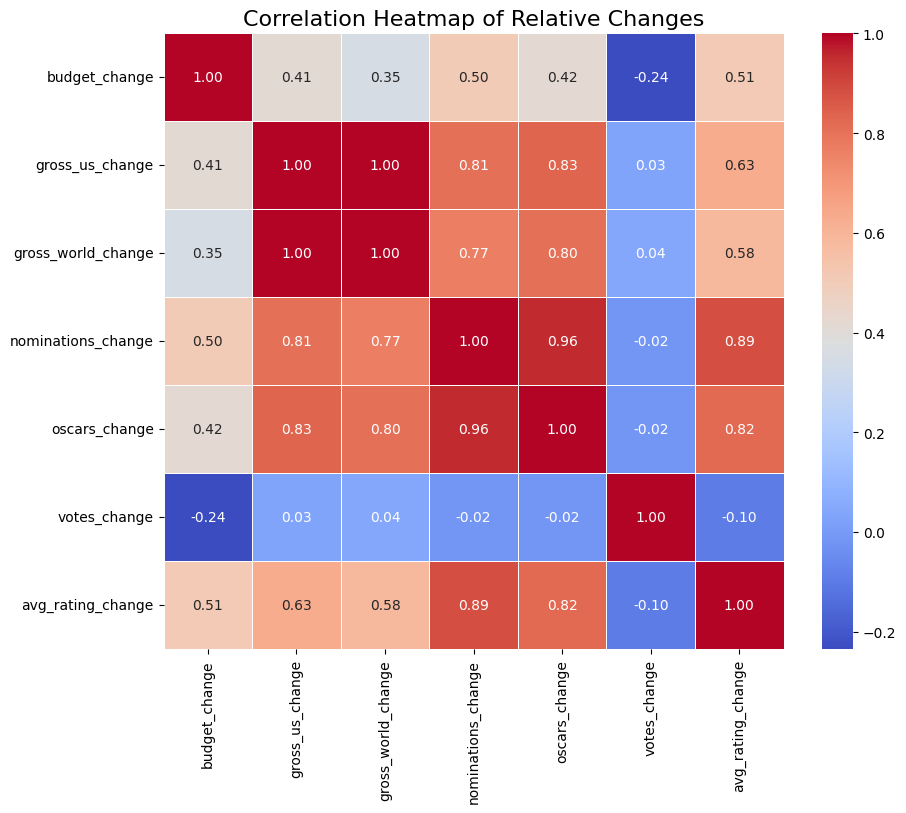

In [45]:
# Heatmap for relative changes
relative_correlation_matrix = grouped_data_full[[
    'budget_change',
    'gross_us_change',
    'gross_world_change',
    'nominations_change',
    'oscars_change',
    'votes_change',
    'avg_rating_change'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(relative_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Relative Changes', fontsize=16)
plt.show()